In [1]:
import pandas as pd


In [2]:
train_df = pd.read_csv(r"train.csv")
test_df = pd.read_csv(r"test.csv")
submission = pd.read_csv(r'C:\Users\IRON MAN\Downloads\sample_submission.csv')

In [3]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
train_df.shape

(7613, 5)

In [6]:
test_df.shape

(3263, 4)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [9]:
train_df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [10]:
test_df.describe()

,id
count,3263.000000
mean,5427.152927
std,3146.427221
min,0.000000
25%,2683.000000
50%,5500.000000
75%,8176.000000
max,10875.000000


In [11]:
train_df.keyword.unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [12]:
train_df.location.unique()

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [13]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

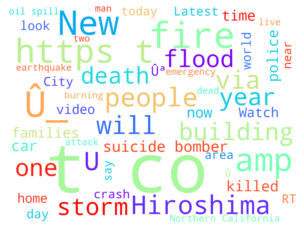

In [14]:
''''
target_1 = ' '.join(list(train_df[train_df['target']==1]['text'])) # text column will print
target_1 = WordCloud(width=600, height=500).generate(target_1)

image = Image.fromarray(target_1.to_array())
background = Image.open('d.png')
background = background.resize(image.size)
new_image = Image.alpha_composite(background, image)
plt.figure(figsize=(10, 5))
plt.imshow(target_1,interpolation = 'bilinear')  
plt.show()
'''

#/target_1 = ' '.join(list(train_df[train_df['target']==1]['text']))
mask = np.array(Image.open("ad.png"))
wordcloud = WordCloud(width = 1000, height= 600,background_color='white', max_words=50, mask=mask,contour_color='#023075',colormap='rainbow').generate(' '.join(list(train_df[train_df['target']==1]['text'])))
# create image as cloud
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

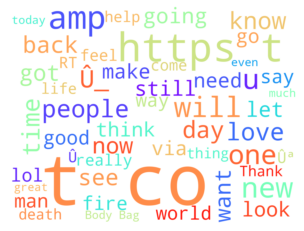

In [15]:
mask = np.array(Image.open("ad.png"))
wordcloud = WordCloud(width = 1000, height= 600,background_color='white', max_words=50, mask=mask,contour_color='#023075',colormap='rainbow').generate(' '.join(list(train_df[train_df['target']==0]['text'])))
# create image as cloud
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Visualizing the Tweets

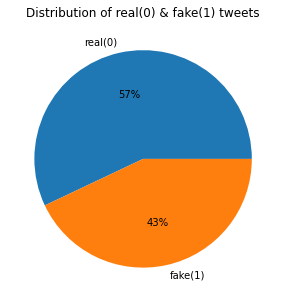

In [16]:
# import required module
import matplotlib.pyplot as plt
import seaborn as sns

a = train_df.groupby(['target']).count()['id'][0],train_df.groupby(['target']).count()['id'][1]
labels = ['real(0)','fake(1)']

# Creating plot
fig = plt.figure(figsize=(5, 5))
plt.pie(a  , labels=labels, autopct = '%0.0f%%')
# Show plot
plt.title("Distribution of real(0) & fake(1) tweets")
plt.show()


## pre-processing

In [17]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [18]:
test_df.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [19]:
# drop the null values columns
train_df.drop(['keyword','location','id'], axis = 1, inplace = True)
# drop the null values columns
test_df.drop(['keyword','location','id'], axis = 1, inplace = True)

In [20]:
train_df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


## remove_punctuation

In [21]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
def remove_punctuation(text):
    punctuation = ''''!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'1234567890'''
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
train_df['text']= train_df['text'].apply(lambda x:remove_punctuation(x))
train_df.head()

,text,target
0,Our Deeds are the Reason of this earthquake Ma...,1
1,Forest fire near La Ronge Sask Canada,1
2,All residents asked to shelter in place are be...,1
3,13000 people receive wildfires evacuation orde...,1
4,Just got sent this photo from Ruby Alaska as s...,1


In [23]:
def remove_punctuation(text):
    punctuation = ''''!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'1234567890'''
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
test_df['text']= test_df['text'].apply(lambda x:remove_punctuation(x))
test_df.head()

,text
0,Just happened a terrible car crash
1,Heard about earthquake is different cities sta...
2,there is a forest fire at spot pond geese are ...
3,Apocalypse lighting Spokane wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


In [24]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

def con_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key,value)
        return x
    else:
        return x
train_df['text']= train_df['text'].apply(lambda x: con_to_exp(x))
train_df.head()

,text,target
0,Our Deeds are the Reason of this earthquake Ma...,1
1,Forest fire near La Ronge Sask Canada,1
2,All residents asked to shelter in place are be...,1
3,13000 people receive wildfires evacuation orde...,1
4,Just got sent this photo from Ruby Alaska as s...,1


## Lowering the text:

In [25]:
train_df['text']= train_df['text'].apply(lambda x: x.lower())
test_df['text']= test_df['text'].apply(lambda x: x.lower())


## remove_tags

In [26]:
import re
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result
train_df['text']=train_df['text'].apply(lambda x : remove_tags(x))
train_df.head()

,text,target
0,our deeds are the reason of this earthquake ma...,1
1,forest fire near la ronge sask canada,1
2,all residents asked to shelter in place are be...,1
3,13000 people receive wildfires evacuation orde...,1
4,just got sent this photo from ruby alaska as s...,1


## remove url

In [27]:
import re

def remove_url(text_data):
    return re.sub(r"http\S+", "", text_data)


train_df['text'] = train_df['text'].apply(lambda x: remove_url(x))
train_df.head()

,text,target
0,our deeds are the reason of this earthquake ma...,1
1,forest fire near la ronge sask canada,1
2,all residents asked to shelter in place are be...,1
3,13000 people receive wildfires evacuation orde...,1
4,just got sent this photo from ruby alaska as s...,1


## Stop word removal:

In [28]:
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')


def remove_stopwords(text):
    output= ' '.join([i for i in text.split() if i not in stopwords])
    return output

train_df['text']= train_df['text'].apply(lambda x:remove_stopwords(x))
test_df['text']= test_df['text'].apply(lambda x:remove_stopwords(x))

In [29]:
train_df.head()

,text,target
0,deeds reason earthquake may allah forgive us,1
1,forest fire near la ronge sask canada,1
2,residents asked shelter place notified officer...,1
3,13000 people receive wildfires evacuation orde...,1
4,got sent photo ruby alaska smoke wildfires pou...,1


## Lemmatization: 

In [30]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer(text):
    lemm_text = ''.join([wordnet_lemmatizer.lemmatize(word) for word in text])
    return lemm_text
train_df['text']=train_df['text'].apply(lambda x:lemmatizer(x))
test_df['text']=test_df['text'].apply(lambda x:lemmatizer(x))


In [31]:
train_df.head()

,text,target
0,deeds reason earthquake may allah forgive us,1
1,forest fire near la ronge sask canada,1
2,residents asked shelter place notified officer...,1
3,13000 people receive wildfires evacuation orde...,1
4,got sent photo ruby alaska smoke wildfires pou...,1


## Tokenization:

import re

def tokenization(text):

    tokens = re.split('W+',text)
    
    return tokens
    
#applying function to the column

train_df['text']= train_df['text'].apply(lambda x: tokenization(x))

test_df['text']= test_df['text'].apply(lambda x: tokenization(x))


In [32]:
import itertools

ab = itertools.chain(train_df['text'])

list(ab)

['deeds reason earthquake may allah forgive us',
 'forest fire near la ronge sask canada',
 'residents asked shelter place notified officers evacuation shelter place orders expected',
 '13000 people receive wildfires evacuation orders california',
 'got sent photo ruby alaska smoke wildfires pours school',
 'rockyfire update california hwy 20 closed directions due lake county fire cafire wildfires',
 'flood disaster heavy rain causes flash flooding streets manitou colorado springs areas',
 'im top hill see fire woods',
 'theres emergency evacuation happening building across street',
 'im afraid tornado coming area',
 'three people died heat wave far',
 'haha south tampa getting flooded hah wait second live south tampa gonna gonna fvck flooding',
 'raining flooding florida tampabay tampa 18 19 days ive lost count',
 'flood bago myanmar arrived bago',
 'damage school bus 80 multi car crash breaking',
 'whats man',
 'love fruits',
 'summer lovely',
 'car fast',
 'goooooooaaaaaal',
 'ridic

In [33]:
' '.join(train_df['text'])

'deeds reason earthquake may allah forgive us forest fire near la ronge sask canada residents asked shelter place notified officers evacuation shelter place orders expected 13000 people receive wildfires evacuation orders california got sent photo ruby alaska smoke wildfires pours school rockyfire update california hwy 20 closed directions due lake county fire cafire wildfires flood disaster heavy rain causes flash flooding streets manitou colorado springs areas im top hill see fire woods theres emergency evacuation happening building across street im afraid tornado coming area three people died heat wave far haha south tampa getting flooded hah wait second live south tampa gonna gonna fvck flooding raining flooding florida tampabay tampa 18 19 days ive lost count flood bago myanmar arrived bago damage school bus 80 multi car crash breaking whats man love fruits summer lovely car fast goooooooaaaaaal ridiculous london cool love skiing wonderful day looooool wayi cant eat shit nyc last 

In [34]:
train_df.head()['text']

0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents asked shelter place notified officer...
3    13000 people receive wildfires evacuation orde...
4    got sent photo ruby alaska smoke wildfires pou...
Name: text, dtype: object

## Split the Dataset

In [41]:
from sklearn.model_selection import train_test_split

# Extracting X matrix and y vector
X = train_df["text"].to_numpy()

y = train_df["target"].to_numpy()


# splitting the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)
y_train

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

## Text Normalization Using TfidfVectorizer

# from sklearn.feature_extraction.text import TfidfVectorizer


# Creating TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

#test_texts = vectorizer.transform(test_df["text"])

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

train_x_vec = vectorizer.fit_transform(X_train)
test_x_vec = vectorizer.transform(X_test)

## Model Building

In [44]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(train_x_vec, y_train)

y_pred = model.predict(test_x_vec)

In [45]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report


In [48]:
# finding accuracy_score
print("Accuracy Score is =",accuracy_score(y_test, y_pred))

Accuracy Score is = 0.7847769028871391


In [49]:
import seaborn as sns

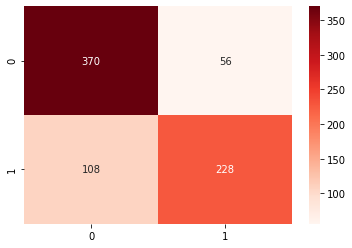

In [50]:
# calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds', fmt='.3g')

In [52]:
# printing classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       426
           1       0.80      0.68      0.74       336

    accuracy                           0.78       762
   macro avg       0.79      0.77      0.78       762
weighted avg       0.79      0.78      0.78       762



In [53]:
submission.to_csv('Submission__4.csv', index=False)

In [54]:
df = pd.read_csv('Submission__4.csv')